*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/6_definite_modifier.ipynb)*

# Time Adverbial Distribution and Collocations
## Definite modifier investigations
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [34]:
! echo "last updated:"; date

last updated:
Tue 30 Jun 2020 15:09:30 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import cm

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 0)

In [5]:
def show_examples(value_counts, df, n_examples=50, condenseType='sentence', **kwargs):
    """Prepares and shows examples from a supplied Series.value_counts()"""
    
    n_to_get = ((value_counts / value_counts.sum()) * n_examples).round()
    samples = []
    
    for word in n_to_get.index:
        n = int(n_to_get.loc[word]) or 1
        examples = df[df['head_voc'] == word]
        get_ilocs = get_spread(examples.shape[0], n)
        return_ex = examples.iloc[get_ilocs, :]
        samples.extend(return_ex.index)
        
    samples = [(ph, L.u(ph, 'sentence')[0]) for ph in samples]
    A.table(samples, condenseType=condenseType, **kwargs)

<hr>

# Examples

## Definite Time and Locas

In [6]:
loca = hm_df[hm_df.function == 'Loca']
time = hm_df[hm_df.function == 'Time']
defi_time = hm_df[(hm_df.function=='Time') & hm_df.definite]
defi_loca  = hm_df[(hm_df.function=='Loca') & hm_df.definite]

In [7]:
def_loc_counts = defi_loca.classi.value_counts()

def_loc_counts

single.prep.definite                                 505
single.prep.definite.def_apposition.demonstrative    31 
single.definite                                      23 
single.prep.definite.quantified.qualitative          14 
single.prep.definite.def_apposition                  8  
single.prep.definite.quantified.cardinal             4  
single.definite.def_apposition.demonstrative         1  
single.prep.definite.def_apposition.ordinal          1  
single.definite.def_apposition.ordinal               1  
single.component.definite                            1  
Name: classi, dtype: int64

In [8]:
def_loc_counts.sum()

589

In [9]:
def_loc_counts / def_loc_counts.sum()

single.prep.definite                                 0.857385
single.prep.definite.def_apposition.demonstrative    0.052632
single.definite                                      0.039049
single.prep.definite.quantified.qualitative          0.023769
single.prep.definite.def_apposition                  0.013582
single.prep.definite.quantified.cardinal             0.006791
single.definite.def_apposition.demonstrative         0.001698
single.prep.definite.def_apposition.ordinal          0.001698
single.definite.def_apposition.ordinal               0.001698
single.component.definite                            0.001698
Name: classi, dtype: float64

In [10]:
def_time_counts = defi_time.classi.value_counts()

def_time_counts

single.prep.definite.def_apposition.demonstrative                      458
single.prep.definite                                                   333
single.definite                                                        221
single.prep.definite.def_apposition.ordinal                            161
single.definite.quantified.qualitative                                 92 
single.definite.def_apposition.demonstrative                           30 
single.component.prep.definite                                         12 
single.prep.definite.quantified.cardinal                               7  
single.prep.definite.quantified.qualitative                            5  
single.definite.quantified.cardinal                                    3  
single.prep.definite.def_apposition                                    2  
single.prep.definite.adjective                                         2  
single.definite.def_apposition.demonstrative.quantified.qualitative    2  
single.definite.def_appos

In [11]:
def_time_counts.sum()

1331

In [12]:
def_time_counts / def_time_counts.sum()

single.prep.definite.def_apposition.demonstrative                      0.344102
single.prep.definite                                                   0.250188
single.definite                                                        0.166041
single.prep.definite.def_apposition.ordinal                            0.120962
single.definite.quantified.qualitative                                 0.069121
single.definite.def_apposition.demonstrative                           0.022539
single.component.prep.definite                                         0.009016
single.prep.definite.quantified.cardinal                               0.005259
single.prep.definite.quantified.qualitative                            0.003757
single.definite.quantified.cardinal                                    0.002254
single.prep.definite.def_apposition                                    0.001503
single.prep.definite.adjective                                         0.001503
single.definite.def_apposition.demonstra

### single.prep.definite

In [13]:
show = ['function', 'ref', 'text', 'sentence']
most_common = 'single.prep.definite' # <- this is the phrase classi that has most overlap between Loca and Time

most_common_loca = defi_loca[defi_loca.classi == most_common]
most_common_time = defi_time[defi_time.classi == most_common]

In [14]:
most_common_loca.leading_prep.value_counts()

ב      347
על     55 
תחת    33 
מן     26 
ל      19 
אל     9  
בין    3  
נגד    3  
אחר    3  
אצל    2  
את     2  
בעד    1  
נכח    1  
עד     1  
Name: leading_prep, dtype: int64

In [15]:
most_common_time.leading_prep.value_counts()

ב      197
עד     64 
ל      42 
כ      11 
בין    10 
אחר    5  
מן     3  
בלת    1  
Name: leading_prep, dtype: int64

In [16]:
# Loca heads in prep + def + noun context
loca_heads = pd.DataFrame(most_common_loca.head_voc.value_counts()[:20])

loca_heads

,head_voc
אֶרֶץ,64
מִדְבָּר,57
שָׂדֶה,26
שֶׁמֶשׁ,25
הַר,24
שָׁמַיִם,20
דֶּרֶךְ,19
עִיר,18
בַּיִת,18
מִזְבֵּחַ,14


In [17]:
top_loca_heads = pd.DataFrame(loca.head_voc.value_counts().head(20))

top_loca_heads

,head_voc
שָׁם,309
אֶרֶץ,203
בַּיִת,89
מִדְבָּר,73
הַר,72
יְרוּשָׁלִַם,50
עִיר,42
מָקֹום,39
שָׂדֶה,36
קֶרֶב,32


In [18]:
top_loca_heads.sum()

head_voc    1203
dtype: int64

In [19]:
top_loca_heads / top_loca_heads.sum() 

,head_voc
שָׁם,0.256858
אֶרֶץ,0.168745
בַּיִת,0.073982
מִדְבָּר,0.060682
הַר,0.059850
יְרוּשָׁלִַם,0.041563
עִיר,0.034913
מָקֹום,0.032419
שָׂדֶה,0.029925
קֶרֶב,0.026600


In [20]:
# Time heads in prep + def + noun context

time_heads = pd.DataFrame(most_common_time.head_voc.value_counts())

time_heads

,head_voc
בֹּקֶר,100
עֶרֶב,79
יֹום,44
לַיְלָה,23
רִאשֹׁון,15
צָהֳרַיִם,12
שָׁנָה,5
מֹועֵד,5
עֵת,5
חֹדֶשׁ,4


In [21]:
time.head_voc.value_counts()

יֹום       1351
עַתָּה     356 
שָׁנָה     261 
עֹולָם     178 
עֵת        155 
          ...  
קְצָת      1   
יֹובֵל     1   
עֵילֹום    1   
זַעַם      1   
שַׁחַר     1   
Name: head_voc, Length: 115, dtype: int64

In [22]:
time.head_voc.value_counts().sum()

3490

In [23]:
time.head_voc.value_counts() / time.head_voc.value_counts().sum() 

יֹום       0.387106
עַתָּה     0.102006
שָׁנָה     0.074785
עֹולָם     0.051003
עֵת        0.044413
             ...   
קְצָת      0.000287
יֹובֵל     0.000287
עֵילֹום    0.000287
זַעַם      0.000287
שַׁחַר     0.000287
Name: head_voc, Length: 115, dtype: float64

In [33]:
# export table for paper
all_heads = [
    pd.DataFrame(time_heads.head(10).reset_index().values, columns=['Time head', 'freq']),
    pd.DataFrame(loca_heads.head(10).reset_index().values, columns=['Loca head', 'freq'])
]

all_heads = pd.concat(all_heads, 1)

all_heads.to_clipboard(index=False)
all_heads

,Time head,freq,Loca head,freq
0,בֹּקֶר,100,אֶרֶץ,64
1,עֶרֶב,79,מִדְבָּר,57
2,יֹום,44,שָׂדֶה,26
3,לַיְלָה,23,שֶׁמֶשׁ,25
4,רִאשֹׁון,15,הַר,24
5,צָהֳרַיִם,12,שָׁמַיִם,20
6,שָׁנָה,5,דֶּרֶךְ,19
7,מֹועֵד,5,עִיר,18
8,עֵת,5,בַּיִת,18
9,חֹדֶשׁ,4,מִזְבֵּחַ,14


## Simple definite

In [25]:
annote_location = paths.project.joinpath('results/spreadsheets/advb_article')

In [26]:
## prepare manual tagging dataset


#dataset = []
#cols = ['ref', 'head_voc', 'text', 'sentence']

#for function, df in [('Time', most_common_time), ('Loca', most_common_loca)]:
#    export_df = df[cols].copy()
#    export_df['link'] = [A.webLink(ph, urlOnly=True) for ph in df.index]
#    export_df.to_csv(annote_location.joinpath(f'{function}_definite.csv'))

In [27]:
most_common_time.shape[0] 

333

In [28]:
most_common_loca.shape[0]

505

In [29]:
most_common_loca.shape[0] + most_common_time.shape[0]

838

### Import annotated data

In [30]:
ann_loca = pd.read_csv(annote_location.joinpath('Loca_definite_annotated.csv'))
ann_time = pd.read_csv(annote_location.joinpath('Time_definite_annotated.csv'))
for df in [ann_loca, ann_time]:
    df.set_index('node', inplace=True)

In [31]:
# merge annotations with additional data
combined_annotes = pd.concat([ann_loca['category'], ann_time['category']])
ann_df = pd.concat([hm_df, combined_annotes], 1, join='inner').fillna(False)

In [32]:
ann_count = pd.pivot_table(
    ann_df,
    index='function',
    columns=['genre', 'category'],
    aggfunc='size',
    fill_value=0,
)
ann_count

genre    instruction                 list                 poetry       \
category        anap frame glob imme anap frame glob name  frame glob   
function                                                                
Loca      17          21    10   3    0    1     7    2    14     77    
Time      0           1     55   0    2    0     4    0    1      45    

genre    prophetic                      prose                       
category      anap frame glob imme name  anap frame glob imme name  
function                                                            
Loca      5         9     66   3    2    50    80    111  4    23   
Time      0         8     41   1    0    2     9     138  26   0

In [34]:
np.zeros(2)

array([0., 0.])

In [35]:
count_tables = {} 
prop_tables = {}
stacked_tables = {}

all_genre = ann_count.groupby(level='category', axis=1).sum()
count_tables['all'] = all_genre
prop_tables['all'] = all_genre.div(all_genre.sum(1), 0)
stacked_tables['all'] = prop_tables['all'].stack()

print('all')
display(count_tables['all'])
display(prop_tables['all'])
print()

for genre in ['prose', 'prophetic', 'poetry']:
    genre_count = ann_count[(genre,)]
    sum_count = genre_count.sum(1)
    prop_count = genre_count.div(sum_count, 0)
    count_tables[genre] = sum_count
    prop_tables[genre] = prop_count
    stacked_tables[genre] = prop_count.stack()
    
    print(genre)
    display(genre_count)
    display(prop_count)
    print()
    
# add missing values to poetry
#for missing in ['imme', 'anap', 'name']:
#    prop_tables['poetry'][missing] = np.zeros(2)

all


category,anap,frame,glob,imme,name
function,,,,,
Loca,72,125,271,10,27
Time,4,19,283,27,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.142574,0.247525,0.536634,0.019802,0.053465
Time,0.012012,0.057057,0.849850,0.081081,0.000000



prose


category,anap,frame,glob,imme,name
function,,,,,
Loca,50,80,111,4,23
Time,2,9,138,26,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.186567,0.298507,0.414179,0.014925,0.085821
Time,0.011429,0.051429,0.788571,0.148571,0.000000



prophetic


category,anap,frame,glob,imme,name
function,,,,,
Loca,5,9,66,3,2
Time,0,8,41,1,0


category,anap,frame,glob,imme,name
function,,,,,
Loca,0.058824,0.105882,0.776471,0.035294,0.023529
Time,0.000000,0.160000,0.820000,0.020000,0.000000



poetry


category,frame,glob
function,,
Loca,14,77
Time,1,45


category,frame,glob
function,,
Loca,0.153846,0.846154
Time,0.021739,0.978261


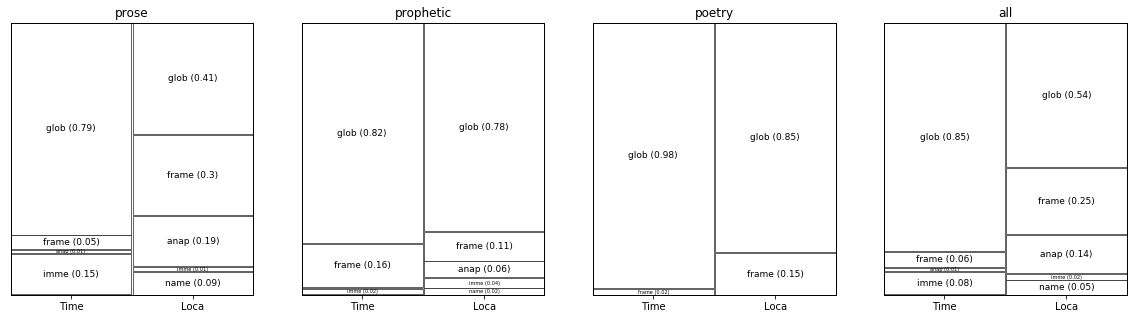

In [36]:
# configs for the mosaic plot

prop_indices = prop_tables['all'].stack().index

def labelizer(key):
    cat = key[1]
    value = round(stacked_tables[genre][key], 2)
    return f'{cat} ({value})'

tile_properties = lambda k: {'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 0.6}

# make the plots
fig = plt.figure(figsize=(20, 5))

i = 1

for genre in ('prose', 'prophetic', 'poetry', 'all'):
    
    props = prop_tables[genre]
    
    ax = fig.add_subplot(1, 4, i)
    
    # config and sort the prop table
    props = props.loc[['Time', 'Loca'], :]
    plot_order = props.quantile(0.75).sort_values().index
    plot_prop = props[plot_order]
    
    mosaic(
        plot_prop.stack(), 
        ax=ax, 
        properties=tile_properties, 
        labelizer=labelizer,
        axes_label=True,
    )
    
    ax.set_title(genre)
    ax.set_yticks([], [])
    ax.set_yticklabels([])
    
    # change fontsize
    new_texts = []
    for text, sample in zip(ax.texts, plot_prop.values.flatten()):
        if 0.01 < sample < 0.05:
            text.set_size(5)
        elif sample >= 0.05:
            text.set_size(9)
        else:
            text.set_text('')
    i += 1
    
savefig('prop_defi_mosaic')

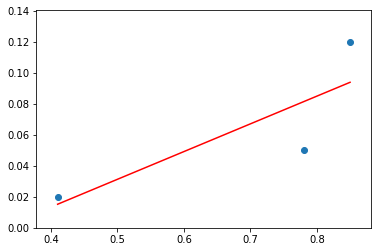

In [37]:
from scipy.stats import linregress
x = np.array([0.41, 0.78, 0.85])
y = np.array([0.02, 0.05, 0.12])

slope, intercept, r, p, std_err = linregress(x,y)
lin_reg_y = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, lin_reg_y, color='red')

In [40]:
lin_reg_y

array([0.0150328 , 0.08122242, 0.09374478])

In [ ]:
p

In [ ]:
r

In [47]:
std_err

0.12290640793124417

## Defi

In [66]:
classi = 'single.prep.definite.def_apposition.demonstrative'
def_app_loc = hm_df[(hm_df.function == 'Loca') & (hm_df.classi == classi)]
def_app_time = hm_df[(hm_df.function == 'Time') & (hm_df.classi == classi)]
                     
display(def_app_loc.head(2))
display(def_app_time.head(2))

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,demon_dist,ordinal,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre
node,,,,,,,,,,,,,,,,,,,,,
664938,Loca,Gen 39:9,Genesis,prep_ph,בית,בַּבַּ֣יִת הַזֶּה֮,ב.ה.בית.ה.זה,אֵינֶ֨נּוּ גָדֹ֜ול בַּבַּ֣יִת הַזֶּה֮ מִמֶּנִּי֒,אֵינֶ֨נּוּ גָדֹ֜ול בַּבַּ֣יִת הַזֶּה֮ מִמֶּנִּי֒,single.prep.definite.def_apposition.demonstrative,...,near,False,NaN,NC,False,NaN,NaN,Gen,Hebrew,prose
670241,Loca,Exod 3:12,Exodus,prep_ph,הר,עַ֖ל הָהָ֥ר הַזֶּֽה׃,על.ה.הר.ה.זה,תַּֽעַבְדוּן֙ אֶת־הָ֣אֱלֹהִ֔ים עַ֖ל הָהָ֥ר הַזֶּֽה׃,בְּהֹוצִֽיאֲךָ֤ אֶת־הָעָם֙ מִמִּצְרַ֔יִם תַּֽעַבְדוּן֙ אֶת־הָ֣אֱלֹהִ֔ים עַ֖ל הָהָ֥ר הַזֶּֽה׃,single.prep.definite.def_apposition.demonstrative,...,near,False,NaN,VC,True,yqtl,עבד,Exod,Hebrew,prose


,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,demon_dist,ordinal,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre
node,,,,,,,,,,,,,,,,,,,,,
653404,Time,Gen 7:11,Genesis,prep_ph,יום,בַּיֹּ֣ום הַזֶּ֗ה,ב.ה.יום.ה.זה,בִּשְׁנַ֨ת שֵׁשׁ־מֵאֹ֤ות שָׁנָה֙ לְחַיֵּי־נֹ֔חַ בַּחֹ֨דֶשׁ֙ הַשֵּׁנִ֔י בְּשִׁבְעָֽה־עָשָׂ֥ר יֹ֖ום לַחֹ֑דֶשׁ בַּיֹּ֣ום הַזֶּ֗ה נִבְקְעוּ֙ כָּֽל־מַעְיְנֹת֙ תְּהֹ֣ום רַבָּ֔ה,בִּשְׁנַ֨ת שֵׁשׁ־מֵאֹ֤ות שָׁנָה֙ לְחַיֵּי־נֹ֔חַ בַּחֹ֨דֶשׁ֙ הַשֵּׁנִ֔י בְּשִׁבְעָֽה־עָשָׂ֥ר יֹ֖ום לַחֹ֑דֶשׁ בַּיֹּ֣ום הַזֶּ֗ה נִבְקְעוּ֙ כָּֽל־מַעְיְנֹת֙ תְּהֹ֣ום רַבָּ֔ה,single.prep.definite.def_apposition.demonstrative,...,near,False,NaN,VC,True,qtl,בקע,Gen,Hebrew,prose
653415,Time,Gen 7:13,Genesis,prep_ph,יום,בְּעֶ֨צֶם הַיֹּ֤ום הַזֶּה֙,ב.עצם.ה.יום.ה.זה,בְּעֶ֨צֶם הַיֹּ֤ום הַזֶּה֙ בָּ֣א נֹ֔חַ וְשֵׁם־וְחָ֥ם וָיֶ֖פֶת בְּנֵי־נֹ֑חַ וְאֵ֣שֶׁת נֹ֗חַ וּשְׁלֹ֧שֶׁת נְשֵֽׁי־בָנָ֛יו אִתָּ֖ם אֶל־הַתֵּבָֽה׃,בְּעֶ֨צֶם הַיֹּ֤ום הַזֶּה֙ בָּ֣א נֹ֔חַ וְשֵׁם־וְחָ֥ם וָיֶ֖פֶת בְּנֵי־נֹ֑חַ וְאֵ֣שֶׁת נֹ֗חַ וּשְׁלֹ֧שֶׁת נְשֵֽׁי־בָנָ֛יו אִתָּ֖ם אֶל־הַתֵּבָֽה׃ הֵ֜מָּה וְכָל־הַֽחַיָּ֣ה לְמִינָ֗הּ וְכָל־הַבְּהֵמָה֙ לְמִינָ֔הּ וְכָל־הָרֶ֛מֶשׂ הָרֹמֵ֥שׂ עַל־הָאָ֖רֶץ לְמִינֵ֑הוּ וְכָל־הָעֹ֣וף לְמִינֵ֔הוּ כֹּ֖ל צִפֹּ֥ור כָּל־כָּנָֽף׃,single.prep.definite.def_apposition.demonstrative,...,near,False,NaN,VC,True,qtl,בוא,Gen,Hebrew,prose


In [71]:
# look at the heads

head_defapps_loc = pd.DataFrame(def_app_loc.head_voc.value_counts())

head_defapps_loc

,head_voc
מָקֹום,9
אֶרֶץ,5
הַר,4
בַּיִת,3
מִדְבָּר,3
עִיר,2
גֹּוי,1
מָעֹוז,1
לִשְׁכָּה,1
חֶלְקָה,1


In [78]:
head_defapps_loc.index

Index(['מָקֹום', 'אֶרֶץ', 'הַר', 'בַּיִת', 'מִדְבָּר', 'עִיר', 'גֹּוי',
       'מָעֹוז', 'לִשְׁכָּה', 'חֶלְקָה', 'מִקְנֶה'],
      dtype='object')

In [72]:
# look at the heads
head_defapps_time = pd.DataFrame(def_app_time.head_voc.value_counts())
head_defapps_time

,head_voc
יֹום,352
עֵת,65
לַיְלָה,18
דָּבָר,12
שָׁנָה,6
פַּעַם,3
חֹדֶשׁ,2


In [83]:
show_examples(head_defapps_loc, def_app_loc, n_examples=40)

Index(['מָקֹום', 'אֶרֶץ', 'הַר', 'בַּיִת', 'מִדְבָּר', 'עִיר', 'גֹּוי',
       'מָעֹוז', 'לִשְׁכָּה', 'חֶלְקָה', 'מִקְנֶה'],
      dtype='object')


n,p,phrase,sentence
1,1_Kings 13:8,בַּמָּקֹ֖ום הַזֶּֽה׃,וְלֹ֣א אֶשְׁתֶּה־מַּ֔יִם בַּמָּקֹ֖ום הַזֶּֽה׃
2,1_Kings 13:16,בַּמָּקֹ֖ום הַזֶּֽה׃,וְלֹֽא־אֶשְׁתֶּ֤ה אִתְּךָ֙ מַ֔יִם בַּמָּקֹ֖ום הַזֶּֽה׃
3,Jeremiah 7:6,בַּמָּקֹ֣ום הַזֶּ֑ה,וְדָ֣ם נָקִ֔י אַֽל־תִּשְׁפְּכ֖וּ בַּמָּקֹ֣ום הַזֶּ֑ה
4,Jeremiah 14:13,בַּמָּקֹ֖ום הַזֶּֽה׃ ס,כִּֽי־שְׁלֹ֤ום אֱמֶת֙ אֶתֵּ֣ן לָכֶ֔ם בַּמָּקֹ֖ום הַזֶּֽה׃ ס
5,Jeremiah 16:2,בַּמָּקֹ֖ום הַזֶּֽה׃,וְלֹֽא־יִהְי֤וּ לְךָ֙ בָּנִ֣ים וּבָנֹ֔ות בַּמָּקֹ֖ום הַזֶּֽה׃
6,Jeremiah 16:3,בַּמָּקֹ֣ום הַזֶּ֑ה,כִּי־כֹ֣ה׀ אָמַ֣ר יְהוָ֗ה עַל־הַבָּנִים֙ וְעַל־הַבָּנֹ֔ות הַיִּלֹּודִ֖ים בַּמָּקֹ֣ום הַזֶּ֑ה וְעַֽל־אִמֹּתָ֞ם הַיֹּלְדֹ֣ות אֹותָ֗ם וְעַל־אֲבֹותָ֛ם הַמֹּולִדִ֥ים אֹותָ֖ם בָּאָ֥רֶץ הַזֹּֽאת׃
7,Jeremiah 19:7,בַּמָּקֹ֣ום הַזֶּ֔ה,וּ֠בַקֹּתִי אֶת־עֲצַ֨ת יְהוּדָ֤ה וִירוּשָׁלִַ֨ם֙ בַּמָּקֹ֣ום הַזֶּ֔ה
8,Jeremiah 22:3,בַּמָּקֹ֥ום הַזֶּֽה׃,וְדָ֣ם נָקִ֔י אַֽל־תִּשְׁפְּכ֖וּ בַּמָּקֹ֥ום הַזֶּֽה׃
9,Jeremiah 44:29,בַּמָּקֹ֣ום הַזֶּ֑ה,כִּֽי־פֹקֵ֥ד אֲנִ֛י עֲלֵיכֶ֖ם בַּמָּקֹ֣ום הַזֶּ֑ה
10,Deuteronomy 4:22,בָּאָ֣רֶץ הַזֹּ֔את,כִּ֣י אָנֹכִ֥י מֵת֙ בָּאָ֣רֶץ הַזֹּ֔את


In [90]:
for node in hm_df[(hm_df.function == 'Loca') & (hm_df.classi == 'single.definite')].index:
    A.plain(L.u(node,'sentence')[0], highlights={node}, condenseType='sentence')